# PDA PROJECT 1: *BREAST CANCER DIAGNOSTIC DATASET*

Roberto Vergano
***

**TABLE OF CONTENTS**

1. Background information. 
2. Breast cancer diagnostic: Real-world dataset.
3. Model and synthesize the dataset.
4. Data prediction.
5. Discussion.
6. References. 

## 1. BACKGROUND INFORMATION

***

Breast cancer is the most common cancer in women worldwide, with a great diversity in outcomes among individual patients. The ability to accurately predict a breast cancer outcome is important to patients, physicians, researchers, and policy makers. Many models have been developed and tested in different settings.(1)

Breast cancer is generally diagnosed through either screening or a symptom (e.g., pain or a palpable mass) that prompts a diagnostic exam. Screening of healthy women is associated with the detection of tumors that are smaller, have lower odds of metastasis, are more amenable to breast-conserving and limited axillary surgery, and are less likely to require chemotherapy.(2)

The size of a breast cancer at diagnosis has conventionally been thought of as a fundamental and critical determinant of clinical outcome. However, the tendency of some subtypes of breast cancer to behave aggressively, despite being small (</=1 cm in diameter), questions the premise that cancer size should always be considered in treatment decisions.(3)

### 1.2 BREAST CANCER WISCONSIN (DIAGNOSTIC) DATASET

In this project, we will review the Breast Cancer Wisconsin dataset which describes the characteristics of the tumor cells from breast cancer patients.(4)

This dataset has ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)    
b) texture (standard deviation of gray-scale values)    
c) perimeter    
d) area    
e) smoothness (local variation in radius lengths)    
f) compactness (perimeter^2 / area - 1.0)    
g) concavity (severity of concave portions of the contour)    
h) concave points (number of concave portions of the contour)    
i) symmetry    
j) fractal dimension ("coastline approximation" - 1) 

Depending on these features, the dataset predicts whether the tumor could be considered benign (B) or malignant(M). 

The aim of this project is to study the first four features which are closely related to size: radius, texture, perimeter and area. Then, we will try to replicate and model a dataset with the same characteristics. 

## 2. BREAST CANCER DIAGNOSTIC: REAL-WORLD DATASET

***

First, we are going to study the real dataset in order to replicate it. 

In [12]:
# Python libraries:
# Pandas for reading and manipulate the datasets
import pandas as pd
# Seaborn and matplotlib for data visualization. 
import seaborn as sns
import matplotlib.pyplot as plt
# Numpy to work with arrays. 
import numpy as np

Realdata will be our original breast cancer dataset.

In [13]:
# pd.read_csv from pandas to read the dataset.(5) 
realdata = pd.read_csv("data.csv")
realdata

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


We are going to extract the features from the realdata dataset which we are interested in: diagnosis, radius, texture, perimeter and area. Create a subset of data (df) from our full dataset.(6)

In [14]:
df = realdata[["diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean"]]
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
0,M,17.99,10.38,122.80,1001.0
1,M,20.57,17.77,132.90,1326.0
2,M,19.69,21.25,130.00,1203.0
3,M,11.42,20.38,77.58,386.1
4,M,20.29,14.34,135.10,1297.0
...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0
565,M,20.13,28.25,131.20,1261.0
566,M,16.60,28.08,108.30,858.1
567,M,20.60,29.33,140.10,1265.0


This is the dataset we are going to try to replicate, so the next step is to find out the main attributes of this dataset to see how the data are distributed. For this task, we can use an integrated function from pandas **pd.DataFrame.describe**.(7)

In [15]:
pd.DataFrame.describe(df)

,radius_mean,texture_mean,perimeter_mean,area_mean
count,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104
std,3.524049,4.301036,24.298981,351.914129
min,6.981000,9.710000,43.790000,143.500000
25%,11.700000,16.170000,75.170000,420.300000
50%,13.370000,18.840000,86.240000,551.100000
75%,15.780000,21.800000,104.100000,782.700000
max,28.110000,39.280000,188.500000,2501.000000


Using seaborn, we will visualize how the data are distributed, particularly, using histograms.(8)

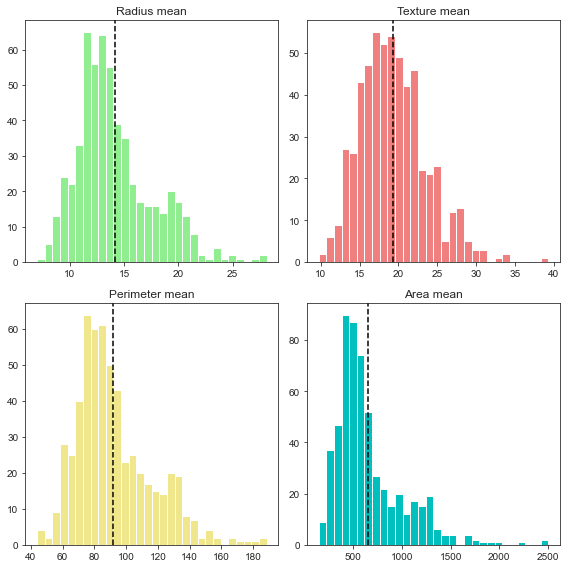

In [16]:
# For adding ticks to the axes (9):
sns.set_style('ticks')

# plt.sublopts to create 1 histogram for each feature and all together. 
# We adjust the number of rows and columns plus the figure size (10).  
f, ax = plt.subplots(2,2,figsize=(8,8))

# For adding titles to our histograms(10):
ax[0,0].set_title("Radius mean")
ax[0,1].set_title("Texture mean")
ax[1,0].set_title("Perimeter mean")
ax[1,1].set_title("Area mean")

# To create the histograms for each feature(11):
ax[0,0].hist(df["radius_mean"], bins = 30, color="lightgreen")
ax[0,1].hist(df["texture_mean"], bins = 30, color="lightcoral")
ax[1,0].hist(df["perimeter_mean"], bins = 30, color="khaki")
ax[1,1].hist(df["area_mean"], bins = 30, color="c")

# "axvline" to add a vertical line where the mean is. (12)
# "mean()" function to calculate the mean.(13)
ax[0,0].axvline(df["radius_mean"].mean(), color ="k", linestyle = "dashed")
ax[0,1].axvline(df["texture_mean"].mean(), color ="k", linestyle = "dashed")
ax[1,0].axvline(df["perimeter_mean"].mean(), color ="k", linestyle = "dashed")
ax[1,1].axvline(df["area_mean"].mean(), color ="k", linestyle = "dashed")

# To adjust the padding between and around subplots.(14)
plt.tight_layout()

For the diagnosis feature, we can assume a binomial distribution since there are 2 possible outcomes: bening (B) or malign (M)

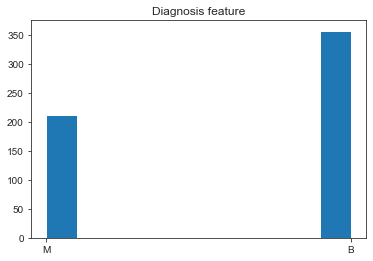

In [17]:
# Histogram of the diagnosis feature. 
plt.hist(df["diagnosis"])
plt.title("Diagnosis feature")
plt.show()

We can observe from the histograms that

· Diagnosis follows a binomial distribution. According to the dataset 63% of the tumors are bening and 37% malignant. Overall, there are more tumors classified as bening, we will have to consider this proportion for our simulated dataset.    
· Texture follows a normal distribution.     
· Radius, perimeter and area mean have a right skewed distribution. We can observe how the top of the curve falls next to the main. It could be a gamma, exponential, weibull, lognormal or beta distribution. The next step will be to understand the reason behind these distributions. 

What are the values displacing the mean outside the top of the curve? Is it due to differences within the variables? 

To answer these questions, we are going to study the relationship between variables. Using **sns.pairplot** we can create a grid of axes to compare all the features.(15) 

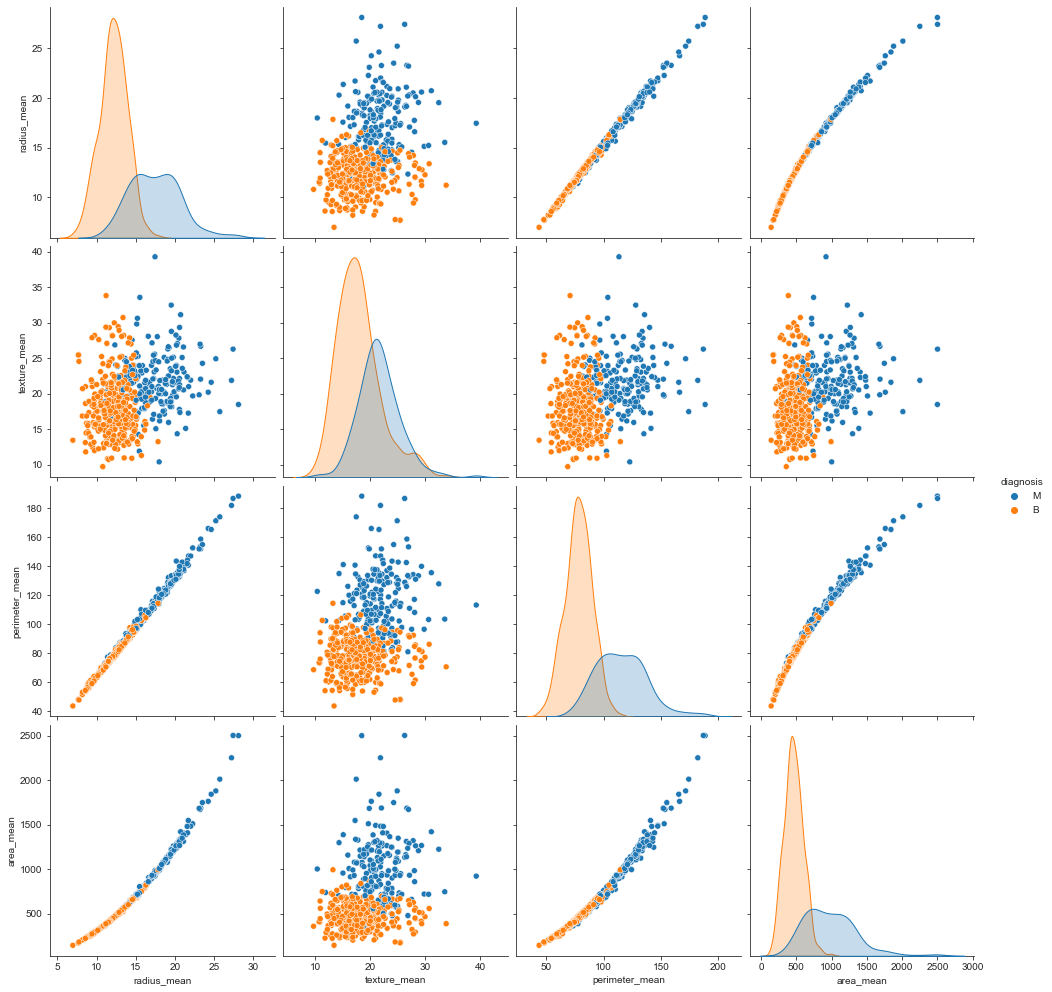

In [18]:
# hue="diagnosis" To map according the diagnosis feature in different colors.
sns.pairplot(df, hue="diagnosis",height=3.5)

From this plot we can conclude:

1.Size features like area, perimeter and radius can be indicative that the tumor is bening or malignant. The bigger these feature are, the greater the probability that the tumor is malignant.    
2.Texture seems to be clearly differenciated as well between bening and malignant tumors. The bigger the texture is, the greater the probability that the tumor is malignant.    
3.When grouped by diagnosis, the data for the variables seem to be differenciated clearly in the two groups (beningn and malignant). Each of them following a normal distribution.

## 3. MODEL AND SYNTHESIZE THE DATASET.
***

What do we need to consider in order to model and synthesize our dataset?

1.There is major proportion of bening tumors (63%) than malignant (37%).    
2.Mean, perimeter, area and texture follow a normal distribution. However, the data within the features are differenciated by class (bening or malignant). This means we will have to create two datasets, one for bening data and one for malignant data. 

### 3.1 BENIGN AND MALIGNANT SIMULATED DATASETS

In order to create our bening dataset (dfb) and the malignant dataset (dfm) we need to extract from the real dataset all the features with a bening or a malignant outcome, separately. 

**1) Extract the benign and malignant data from the real dataset.**

**Bening tumor data**

In [19]:
# "loc" to access all the rows with the diagnosis outcome "bening".(16)
dfb = df.loc[df["diagnosis"] == "B"]
# Then we will use pandas describe to obtain the main characteristics.(7)
pd.DataFrame.describe(dfb)

,radius_mean,texture_mean,perimeter_mean,area_mean
count,357.000000,357.000000,357.000000,357.000000
mean,12.146524,17.914762,78.075406,462.790196
std,1.780512,3.995125,11.807438,134.287118
min,6.981000,9.710000,43.790000,143.500000
25%,11.080000,15.150000,70.870000,378.200000
50%,12.200000,17.390000,78.180000,458.400000
75%,13.370000,19.760000,86.100000,551.100000
max,17.850000,33.810000,114.600000,992.100000


**Malignant tumor data**

In [20]:
# Now we do the same with the malignant data.
dfm = df.loc[df["diagnosis"] == "M"]
pd.DataFrame.describe(dfm)

,radius_mean,texture_mean,perimeter_mean,area_mean
count,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415
std,3.203971,3.779470,21.854653,367.937978
min,10.950000,10.380000,71.900000,361.600000
25%,15.075000,19.327500,98.745000,705.300000
50%,17.325000,21.460000,114.200000,932.000000
75%,19.590000,23.765000,129.925000,1203.750000
max,28.110000,39.280000,188.500000,2501.000000


Looking at the two tables we observe that, overall, the size of the malignant tumors is bigger than the benign tumors. 

It is important to note as well the proportion of the bening tumors (357/569) and malignant tumors (212/569).

**2) Creation of the simulated datasets.**

We are going to create our simulated datasets using as reference the mean, standard deviation, maximum and minimum values of our real dataset and based on a normal distribution. 

**Simulated benign dataset (dsb).**

In [23]:
# We keep the diagnosis feature since the outcome is the same for the whole dataset. 
dfb_diagnosis = dfb["diagnosis"]

# "np.random.normal" to create random sequence of numbers following a normal distribution.(17)(18)
# "np.mean","np.std","min()" and max() to calculate the mean, standard deviation, maximum and minimum values for each feature.(19,20,21,22)
# "np.clip" to limit the values of the array using the mininum and maximum values as reference.(23)
# The size of the dataframe will be iqual to the proportion of bening tumors within the real dataset (357).

dfb_radius_mean = np.clip(np.random.normal(np.mean(dfb["radius_mean"]),np.std(dfb["radius_mean"]),357),dfb["radius_mean"].min(),dfb["radius_mean"].max())

dfb_texture_mean = np.clip(np.random.normal(np.mean(dfb["texture_mean"]),np.std(dfb["texture_mean"]),357),dfb["texture_mean"].min(),dfb["texture_mean"].max())

dfb_perimeter_mean = np.clip(np.random.normal(np.mean(dfb["perimeter_mean"]),np.std(dfb["perimeter_mean"]),357),dfb["perimeter_mean"].min(),dfb["perimeter_mean"].max())

dfb_area_mean = np.clip(np.random.normal(np.mean(dfb["area_mean"]),np.std(dfb["area_mean"]),357),dfb["area_mean"].min(),dfb["area_mean"].max())

# Finally, using "pandas Dataframe", we will put together the four simulated variables in a single dataset.(24)

dsb = pd.DataFrame({"diagnosis": dfb_diagnosis,"radius_mean":dfb_radius_mean,"texture_mean":dfb_texture_mean,"perimeter_mean":dfb_perimeter_mean,"area_mean":dfb_area_mean})

**Simulated malignant dataset (dsm).**

In [24]:
# We follow the same steps as before with the bening dataset.

dfm_diagnosis = dfm["diagnosis"]

dfm_radius_mean = np.clip(np.random.normal(np.mean(dfm["radius_mean"]),np.std(dfm["radius_mean"]),212),dfm["radius_mean"].min(),dfm["radius_mean"].max())

dfm_texture_mean = np.clip(np.random.normal(np.mean(dfm["texture_mean"]),np.std(dfm["texture_mean"]),212),dfm["texture_mean"].min(),dfb["texture_mean"].max())

dfm_perimeter_mean = np.clip(np.random.normal(np.mean(dfm["perimeter_mean"]),np.std(dfm["perimeter_mean"]),212),dfm["perimeter_mean"].min(),dfm["perimeter_mean"].max())

dfm_area_mean = np.clip(np.random.normal(np.mean(dfm["area_mean"]),np.std(dfm["area_mean"]),212),dfm["area_mean"].min(),dfm["area_mean"].max())

dsm = pd.DataFrame({"diagnosis": dfm_diagnosis,"radius_mean":dfm_radius_mean,"texture_mean":dfm_texture_mean,"perimeter_mean":dfm_perimeter_mean,"area_mean":dfm_area_mean})

**3. Concatenate the simulated datasets.**

In [25]:
# "pd.concat" to concatenate the simulated datasets.(25)
# "ignore_index=True" to not use the index values along the concatenation axis.(25)

ds = pd.concat([dsb, dsm], ignore_index=True)

# Our final simulated dataset: 
ds

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
0,B,10.096489,15.961766,64.764959,205.208529
1,B,13.125240,20.863960,83.913547,458.055184
2,B,12.553935,23.801330,106.730159,406.914589
3,B,7.716305,18.432678,85.091014,372.451767
4,B,11.081768,19.281286,76.666890,445.930177
...,...,...,...,...,...
564,M,17.950182,27.853437,110.122117,361.600000
565,M,18.621511,22.544282,122.293318,361.600000
566,M,21.302397,18.527723,86.435745,1047.927759
567,M,18.526220,19.666049,100.048172,823.397940


**Simulated dataset descriptive statistics**

In [186]:
# To generate descriptive statistics:
pd.DataFrame.describe(ds)

,radius_mean,texture_mean,perimeter_mean,area_mean
count,569.000000,569.000000,569.000000,569.000000
mean,14.008024,19.432845,91.239507,647.421668
std,3.305724,4.287546,24.499423,341.302799
min,6.981000,9.710000,43.940026,143.500000
25%,11.680618,16.368170,74.241775,409.313950
50%,13.280605,19.372678,85.627965,542.952760
75%,16.167324,22.155106,103.207020,814.236730
max,28.085686,31.452189,184.134619,1792.717097


**Real dataset descriptive statistics**

In [27]:
# To generate descriptive statistics:
pd.DataFrame.describe(df)

,radius_mean,texture_mean,perimeter_mean,area_mean
count,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104
std,3.524049,4.301036,24.298981,351.914129
min,6.981000,9.710000,43.790000,143.500000
25%,11.700000,16.170000,75.170000,420.300000
50%,13.370000,18.840000,86.240000,551.100000
75%,15.780000,21.800000,104.100000,782.700000
max,28.110000,39.280000,188.500000,2501.000000


Comparing the statiscis of the real and the simulated datasets we observe that the simulated dataset is very similar to the real one.

The nexts steps will be:

1.Visualize the data distribution of the simulated dataset.    
2.Compare with the real dataset. 

### 3.2 VISUALIZATION AND COMPARISON OF THE SIMULATED DATASET.

**Simulated dataset histogram**

Same as we did before with the real dataset we are going to subplot a set of histograms for each simulated feature to see how the data are distributed. 

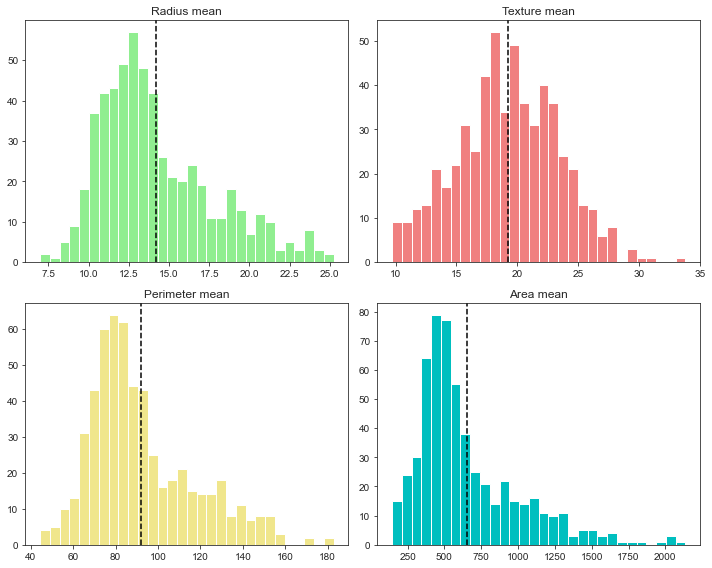

In [28]:
sns.set_style('ticks')

f, axes = plt.subplots(2,2,figsize=(10,8))

axes[0,0].set_title("Radius mean")
axes[0,1].set_title("Texture mean")
axes[1,0].set_title("Perimeter mean")
axes[1,1].set_title("Area mean")

axes[0,0].hist(ds["radius_mean"], bins = 30, color="lightgreen")
axes[0,1].hist(ds["texture_mean"], bins = 30, color="lightcoral")
axes[1,0].hist(ds["perimeter_mean"], bins = 30, color="khaki")
axes[1,1].hist(ds["area_mean"], bins = 30, color="c")

axes[0,0].axvline(ds["radius_mean"].mean(), color ="k", linestyle = "dashed")
axes[0,1].axvline(ds["texture_mean"].mean(), color ="k", linestyle = "dashed")
axes[1,0].axvline(ds["perimeter_mean"].mean(), color ="k", linestyle = "dashed")
axes[1,1].axvline(ds["area_mean"].mean(), color ="k", linestyle = "dashed")

plt.tight_layout()

The data distribution is very similar to the real dataset. radius, perimeter and area features have a right skewed distribution while texture has a more symmetrical distribution. Same as we saw with the real dataset. 

**Datasets comparison: density curve**

We are going to plot the density curve of both datasets in order to compare the data distribution.

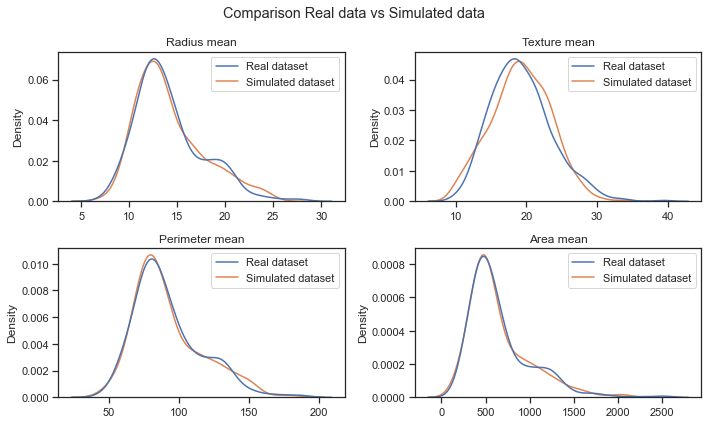

In [29]:
# First we need to create a dataframe with both datasets for each feature.(24)

rm =pd.DataFrame({"Real dataset": df["radius_mean"], "Simulated dataset":ds["radius_mean"]})
tm =pd.DataFrame({"Real dataset": df["texture_mean"], "Simulated dataset":ds["texture_mean"]})
pm =pd.DataFrame({"Real dataset": df["perimeter_mean"], "Simulated dataset":ds["perimeter_mean"]})
am =pd.DataFrame({"Real dataset": df["area_mean"], "Simulated dataset":ds["area_mean"]})

# To add ticks in the axes (9)
sns.set(style="ticks")

# We adjust the number of rows and columns plus the figure size (10).  
figure, axes = plt.subplots(2,2,figsize=(10,6))

# For adding titles to our density curves(10):
figure.suptitle("Comparison Real data vs Simulated data")

axes[0,0].set_title("Radius mean")
axes[0,1].set_title("Texture mean")
axes[1,0].set_title("Perimeter mean")
axes[1,1].set_title("Area mean")

# To create the density curves for each feature compared with the real dataset(26):
sns.kdeplot(ax=axes[0,0], data=rm)
sns.kdeplot(ax=axes[0,1], data=tm)
sns.kdeplot(ax=axes[1,0], data=pm)
sns.kdeplot(ax=axes[1,1], data=am)

# To adjust the padding between and around subplots.(14)
plt.tight_layout()

The data distribution between the real and simulated dataset is very similar, with differences in the density at the right part of the density curves.

**Datasets comparison: box plots**

Another way to compare the distributions between the real and simulated datasets is using box plots.

A box plot shows the distribution of quantitative data between variables or across levels of a categorical variable. With this method we can also observe the points outside the distribution, or "outliers". 

Using **sns.boxplot** we can draw box plots for each variable of each dataset.(27)

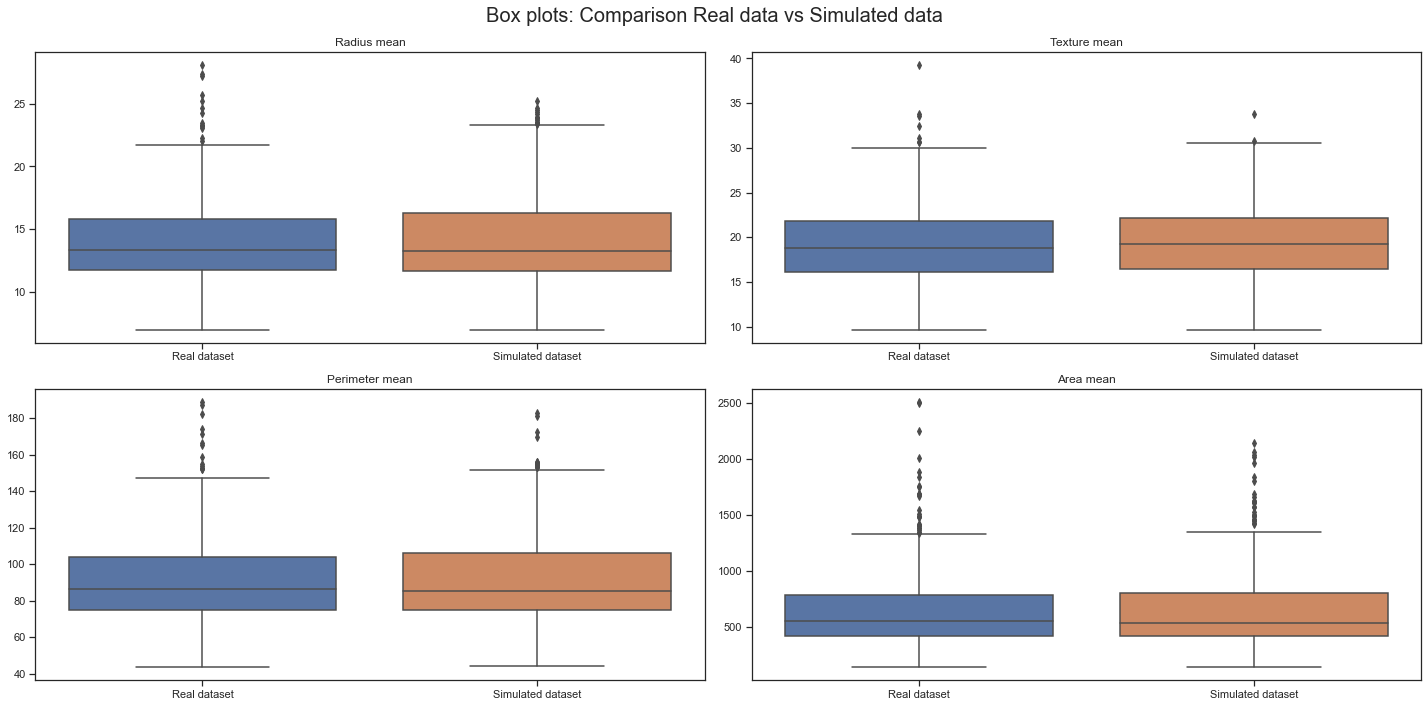

In [30]:
# To add ticks in the axes (9)
sns.set(style="ticks")

# We adjust the number of rows and columns plus the figure size (10).  
figure, axes = plt.subplots(2,2,figsize=(20,10))

# For adding titles to our box plots(10):
figure.suptitle("Box plots: Comparison Real data vs Simulated data", fontsize =20)

axes[0,0].set_title("Radius mean")
axes[0,1].set_title("Texture mean")
axes[1,0].set_title("Perimeter mean")
axes[1,1].set_title("Area mean")

# We will reuse the same dataframes from the density curves.
# To create the box plots for each feature compared with the real dataset(27):
sns.boxplot(ax=axes[0,0], data=rm)
sns.boxplot(ax=axes[0,1], data=tm)
sns.boxplot(ax=axes[1,0], data=pm)
sns.boxplot(ax=axes[1,1], data=am)

# To adjust the padding between and around subplots.(14)
plt.tight_layout()

We observe similar box plots between the real and simulated dataset. Meaning that the distributions are quite similar. 

We can also observe a presence of outliers in the top values of the distribution, this values could be the cause of the asymmetrical distribution, desplacing the curve to the right as we saw before. 

**Simulated dataset: features comparison**

We are going to study the relationship between variables to see whether they match the real dataset or not. Using sns.pairplot we can create a grid of axes to compare all the features.(15) 

Here, we need to consider that when creating a random sequence of numbers for each variable we lose the relationship between variables. 

This is more evident if we take into account that radius and perimeter are related by the formula:    

p = 2πr, (p=perimeter, r= radius) (28)    

and same for area and radius:    

A = π r², (A= area, r = radius) (29)    

Therefore, random values of these variables will provide random relatioship between variables.

Text(0.5, 1.05, 'Simulated dataset features comparison')

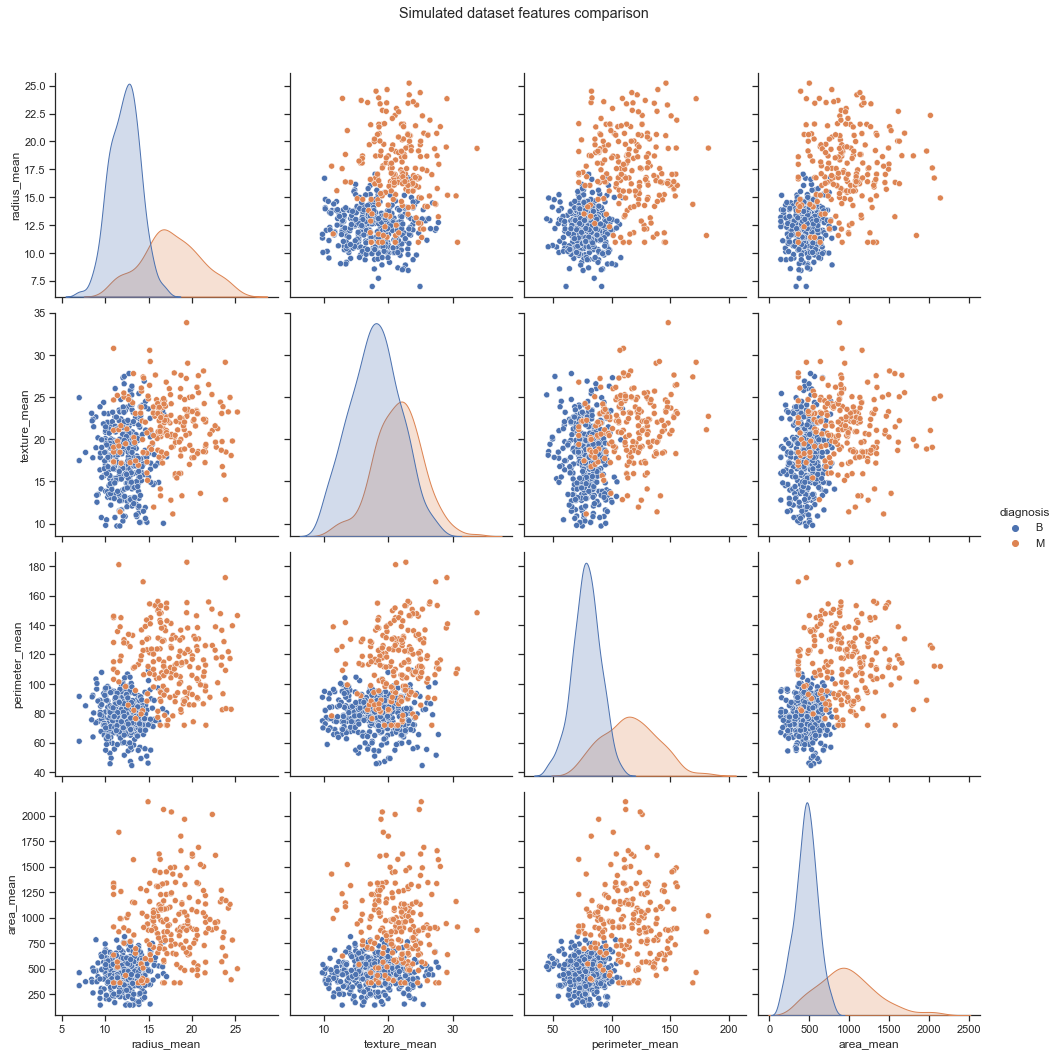

In [31]:
g = sns.pairplot(ds, hue="diagnosis",height=3.5)
g.fig.suptitle("Simulated dataset features comparison", y =1.05)

We lost the relationship between variables, however we still have the relation between size and diagnosis. The bigger the size is, the greater the probability of the tumor being malignant. 

**Conclusions:** our simulated dataset is very similar to the realdataset. The data is distributed similarly to the real dataset. However, how good is the simulated dataset predicting values compared to the real one?

## 4. DATA PREDICTION

In this part of the project we are going to test how good is

· the real dataset predicting benign or malignant tumors, and    
· the simulated dataset predicting benign or malignant tumors.

The idea here is to create a function that runs a loop checking for random samples from the real dataset and predicting a bening or malignant outcome. The loops breaks when the prediction does not match with the real outcome from the dataset. 

In [33]:
# To predict values we import:
import sklearn.neighbors as nei
from sklearn.model_selection import train_test_split

**Real dataset values prediction**

In [50]:
# First we separate the features (inputs_df) from the expected outcomes (outputs_df):
inputs_df = df[["radius_mean","texture_mean","perimeter_mean","area_mean"]]
outputs_df = df["diagnosis"]

# Create the function "pred":
def pred():
    # We extract a random sample from the real dataframe using df.sample(29)
    sample_df = df.sample(1)
    # Then we create a subset of the sample with the features:
    s = sample_df[["radius_mean","texture_mean","perimeter_mean","area_mean"]]
    # We train our model using our real inputs as reference (31)
    knn = nei.KNeighborsClassifier(n_neighbors=5)
    knn.fit(inputs_df,outputs_df)
    print("Random sample from real dataframe:")
    print()
    print(sample_df)
    print()
    # knn.predict to predict if our sample is bening or malignant.
    print("Prediction from simulated dataframe:", knn.predict(s)) 
    print()
    a = knn.predict(s)
    b = np.array(sample_df["diagnosis"])
    # We create a loop, if the prediction is the same as the outcome from the real sample, the loop keeps running.
    # The loop breaks when the prediction and the outcome from the real sample do not match
    while a == b:
        pred()
        a != b
        break

pred()



Random sample from real dataframe:

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
320         B        10.25         16.18           66.52      324.2

Prediction from simulated dataframe: ['B']

Random sample from real dataframe:

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
552         B        12.77         29.43           81.35      507.9

Prediction from simulated dataframe: ['B']

Random sample from real dataframe:

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
265         M        20.73         31.12           135.7     1419.0

Prediction from simulated dataframe: ['M']

Random sample from real dataframe:

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
288         B        11.26         19.96           73.72      394.1

Prediction from simulated dataframe: ['B']

Random sample from real dataframe:

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
550         B        10.86  

Overall, we get a good amount of predictions for the real dataset.

**Simulated dataset values prediction**

Now, we are going to test if the simulated dataset is good predicting bening or malignant tumors when a real sample is given. 

In [57]:
inputs_ds = ds[["radius_mean","texture_mean","perimeter_mean","area_mean"]]
outputs_ds = ds["diagnosis"]

def sim():
    sample_df = df.sample(1)
    s = sample_df[["radius_mean","texture_mean","perimeter_mean","area_mean"]]
    knn = nei.KNeighborsClassifier(n_neighbors=5)
    knn.fit(inputs_ds,outputs_ds)
    print("Random sample from real dataframe:")
    print()
    print(sample_df)
    print()
    print("Prediction from simulated dataframe:", knn.predict(s)) 
    print()
    print()
    a = knn.predict(s)
    b = np.array(sample_df["diagnosis"])
    while a == b:
        sim()
        a != b
        break

sim()

Random sample from real dataframe:

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
561         B         11.2         29.37           70.67      386.0

Prediction from simulated dataframe: ['B']


Random sample from real dataframe:

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
4         M        20.29         14.34           135.1     1297.0

Prediction from simulated dataframe: ['M']


Random sample from real dataframe:

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
269         B        10.71         20.39            69.5      344.9

Prediction from simulated dataframe: ['B']


Random sample from real dataframe:

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
361         B         13.3         21.57           85.24      546.1

Prediction from simulated dataframe: ['B']


Random sample from real dataframe:

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
470         B        9.667  

We obtain more matches for the real dataset as it is expected, and also a better consistency when running the *pred* function. The *sim* function outputs different amounts of predictions with less consistency.

## 5. DISCUSSION 

## 6. REFERENCES

(1) Phung MT, Tin Tin S, Elwood JM. Prognostic models for breast cancer: a systematic review. BMC Cancer. 2019 Mar 14;19(1):230. doi: 10.1186/s12885-019-5442-6. PMID: 30871490; PMCID: PMC6419427.   
(2) Katsura C, Ogunmwonyi I, Kankam HK, Saha S. Breast cancer: presentation, investigation and management. Br J Hosp Med (Lond). 2022 Feb 2;83(2):1-7. doi: 10.12968/hmed.2021.0459. Epub 2022 Feb 7. PMID: 35243878.   
(3) Foulkes WD, Reis-Filho JS, Narod SA. Tumor size and survival in breast cancer--a reappraisal. Nat Rev Clin Oncol. 2010 Jun;7(6):348-53. doi: 10.1038/nrclinonc.2010.39. Epub 2010 Mar 23. PMID: 20309006.   
(4) Breast Cancer Wisconsin Dataset https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download    
(5) https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html    
(6) https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html    
(7) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html    
(8) https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8    
(9) https://seaborn.pydata.org/generated/seaborn.set_style.html    
(10)https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html     
(11)https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html    
(12)https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html    
(13)https://www.w3schools.com/python/ref_stat_mean.asp    
(14)https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html     
(15)https://seaborn.pydata.org/generated/seaborn.pairplot.html    
(16)https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html    
(17)https://numpy.org/doc/stable/reference/random/index.html    
(18)https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html    
(19)https://numpy.org/doc/stable/reference/generated/numpy.mean.html    
(20)https://numpy.org/doc/stable/reference/generated/numpy.std.html        
(21)https://www.w3schools.com/python/ref_func_max.asp    
(22)https://www.w3schools.com/python/ref_func_min.asp    
(23)https://numpy.org/doc/stable/reference/generated/numpy.clip.html    
(24)https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html    
(25)https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html    
(26)https://seaborn.pydata.org/generated/seaborn.kdeplot.html    
(27)https://seaborn.pydata.org/generated/seaborn.boxplot.html    
(28)https://www.omnicalculator.com/math/circle-perimeter    
(29)https://www.cuemath.com/geometry/area-of-a-circle/    
(30)https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html   
(31)https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html    
(32)https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html